In [23]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv("ADF.csv")
## DATA Source:https://cbr.ru/hd_base/infl/?UniDbQuery.Posted=True&UniDbQuery.From=17.09.2013&UniDbQuery.To=28.02.2024

In [3]:
df = pd.DataFrame(data)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [5]:
df.set_index('Date', inplace=True)

In [6]:
result = adfuller(df['Inf'])

In [7]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.698152
p-value: 0.432065
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


In [8]:
result = adfuller(df['kr'])

In [9]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistic: -3.062779
p-value: 0.029433
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580


In [19]:
#ARIMA Model

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
#ACF,PACF Graph

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\SHIP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


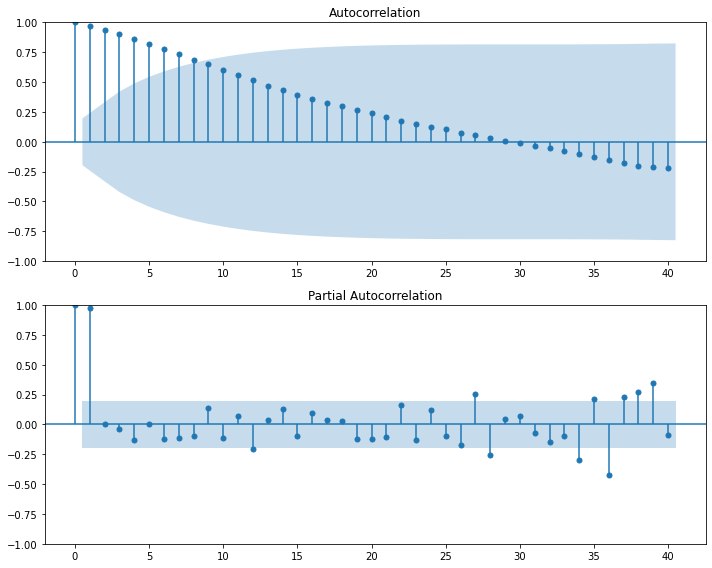

In [14]:
# Simulating time series data
np.random.seed(42)
data = np.random.randn(100).cumsum()

# Plotting ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ACF
sm.graphics.tsa.plot_acf(data, lags=40, ax=ax[0])

# PACF
sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax[1])

plt.tight_layout()
plt.show()

In [21]:
# ACF 8阶拖尾 q=8，PACF 1阶截尾 p=1

In [18]:
np.random.seed(42)
data = pd.DataFrame({'kr': np.random.randn(100).cumsum()})
# Fit an ARIMA model
model = ARIMA(data['kr'], order=(1, 0, 8))
model_fit = model.fit()

# Print out the summary of the fit
print(model_fit.summary())

# Make forecasts
forecast = model_fit.forecast(steps=5)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                     kr   No. Observations:                  100
Model:                 ARIMA(1, 0, 8)   Log Likelihood                -130.582
Date:                Sat, 02 Mar 2024   AIC                            283.165
Time:                        15:55:30   BIC                            311.822
Sample:                             0   HQIC                           294.763
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7507      3.196     -1.799      0.072     -12.014       0.513
ar.L1          0.9777      0.027     35.906      0.000       0.924       1.031
ma.L1          0.0353      0.118      0.299      0.7

WE FAILED, The prediction is a negative value, because there are not enough observations.
失败了，预测出来的是负值